In [1]:
import decimal
from joblib import Parallel, delayed
from random import random

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1 The Logistic Map

Consider the map:$$x_{n+1} = f(x_n) = r x_n(1 - x_n)$$

1. Prove that, for $0 \leq x_n \leq 1$ and $0 \leq r \leq 4$, we have $0 \leq f(x_n) \leq 1$.

Both $x_n$ and $1 - x_n$ are non-negative within the interval $[0, 1]$. Since $r$ is also non-negative (given $0 \leq r \leq 4$), the product $r x_n(1 - x_n)$ must be non-negative.

Otherwise, we have
$$
r x_n(1 - x_n) \leq r \left(\frac{x_n+1-x_n}{2}\right)^2=\frac{r}{4} \leq \frac{4}{4} = 1.
$$

Hence, $0 \leq f(x_n) \leq 1$.

2. Given a trajectory $x_1, x_2, \dots, x_r$, here’s a recipe to make a cobweb plot of a map:

    (a) Plot $(x_1, x_2)$   
    (b) Connect that point to $(x_2, x_2)$  
    (c) Connect this to $(x_2, x_3)$, and so forth  

Starting from some $x_1 \in (0, 1)$, plot a cobweb plot for $r = 0.5, 1.5, 2.5, 3.5$ and $3.9$ with 30 steps.

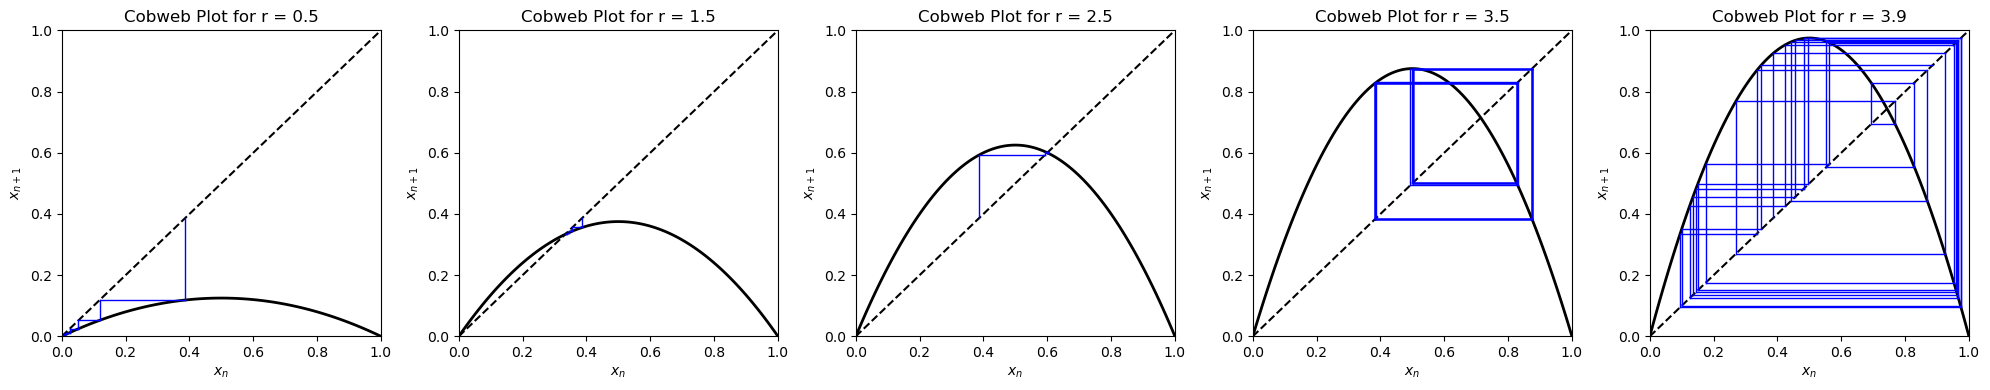

In [2]:
def logistic_map(r, x):
    return r * x * (1 - x)

def cobweb_plot(r, x0, ax, n_steps=30):
    x_values = [x0]
    for _ in range(n_steps):
        x_values.append(logistic_map(r, x_values[-1]))
    
    t = np.linspace(0, 1, 100)
    ax.plot(t, logistic_map(r, t), 'k', lw=2)
    ax.plot(t, t, 'k', linestyle='--')
    
    for i in range(1, len(x_values)):
        ax.plot([x_values[i-1], x_values[i-1]], [x_values[i-1], x_values[i]], 'b', lw=1)
        ax.plot([x_values[i-1], x_values[i]], [x_values[i], x_values[i]], 'b', lw=1)
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f'Cobweb Plot for r = {r}')
    ax.set_xlabel('$x_n$')
    ax.set_ylabel('$x_{n+1}$')

r_values = [0.5, 1.5, 2.5, 3.5, 3.9]
fig, axes = plt.subplots(1, len(r_values), figsize=(4 * len(r_values), 4))
x0 = np.random.rand()
for i, r in enumerate(r_values):
    cobweb_plot(r, x0=x0, ax=axes[i])
plt.tight_layout()


3. Show that the logistic map has a cycle of order 2 for $r > 3$. Use that a 2-cycle requires $f(q) = p$ and $f(p) = q$. What is the stability of the 2-cycle? Does the stability change for some $r > 3$?

First, by solving the equation $f(x)=x$, we get two fixed points $0$ and $1-\frac{1}{r}$. For $r>3$, by solving the equation $f(f(x))=x$, we get another two zero points
$$
p, q = \frac{1}{2r}(r+1\pm\sqrt{(r-3)(r+1)}).
$$

The stability of the 2-cycle is determined by the magnitude of the product of the derivatives at the cycle points:
$$
\mu = |f'(p) \cdot f'(q)| = |r(1 - 2p) \cdot r(1 - 2q)| = |(r-3)(r+1)-1| = |(r-1)^2-5|
$$

- For $ 3 < r < 1 + \sqrt{6} $ (approximately $ 3 < r < 3.449 $), the value of $ \mu $ satisfies $ |\mu| < 1 $, so the 2-cycle is stable.
   
- For $ r > 1 + \sqrt{6} $, the value of $ \mu $ exceeds 1 ($ |\mu| > 1 $), so the 2-cycle becomes unstable.

4. For each $r \in \{0.001, 0.002, \dots, 3.998, 3.999\}$, produce 1000 trajectories starting at random initial conditions with 100 steps. Plot only the endpoints of the trajectories according to their respective $r$ in a 2D-scatter plot.

    **Hint:** Since you only need to plot the last points of the trajectories, don't store the trajectories in order to save memory.  
    **Hint 2:** Make your code flexible so you can use it with other maps as well.


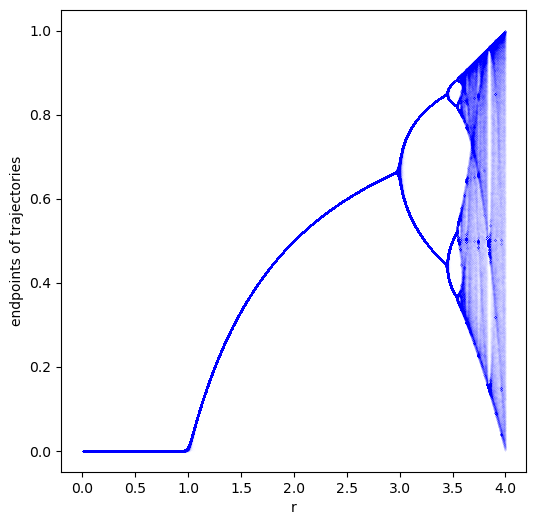

In [13]:
def plot_trajectories(r_values, map_func, n_trajectories, steps):
    endpoints = []
    for r in r_values:
        x = np.random.rand(n_trajectories)
        for _ in range(steps):
            x = map_func(r, x)
        endpoints.extend(x)

    plt.figure(figsize=(6, 6))
    plt.scatter(np.repeat(r_values, 1000), endpoints, s=0.01, color='blue', alpha=0.02)
    plt.xlabel('r')
    plt.ylabel('endpoints of trajectories')

    return endpoints

endpoints = plot_trajectories(np.arange(0.001, 4.0, 0.001), logistic_map, 1000, 100)

5. Redo the plot for $r \in \{3.44500, 3.44501, 3.44502, \dots, 3.56999, 3.57000\}$ and use it to find another $r$ such that the logistic map has a cycle of order $p \geq 3$. Then show the existence of the cycle mathematically.

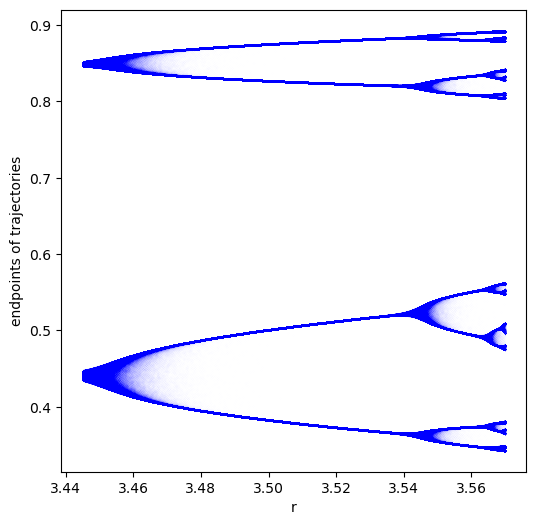

In [4]:
endpoints = plot_trajectories(np.arange(3.445, 3.57, 0.00001), 1000, 100)

From the bifurcation diagram, it is evident that when $ r > 1 + \sqrt{6} $ (approximately 3.449), the logistic map begins to exhibit a 4-cycle. 

To analyze this, we consider the function $ g(x) = f^4(x) - x $, which captures the periodic points of the logistic map. By construction, the two fixed points of the logistic map, $ 0 $ and $ 1 - \frac{1}{r} $, are roots of $ g(x) $, as are the two 2-cycle points, $ p $ and $ q $.

To confirm the existence of additional roots in the intervals between these known points, we compute the derivative of $ g(x) $ at these four points.
 - For $ x = 0 $, we find that $ g'(0) = r^4 - 1 $. 
 - For $ x = 1 - \frac{1}{r} $, the derivative evaluates to $ g'(1 - \frac{1}{r}) = (r - 3)(r - 1)((r - 2) ^ 2 + 1) $. 
 - At the two 2-cycle points $ p $ and $ q $, the derivatives are identical, given by $ g'(p) = g'(q) = (r - 3)(r + 1)((r - 1) ^ 2 - 6) $.

When $ r > 1 + \sqrt{6} $, all these derivatives are positive. Furthermore, evaluating $ g(x) $ at $ x = 1 $ gives $ g(1) = -1 < 0 $. Thus, $ g(x) $ transitions from positive to negative values across the intervals defined by the roots $ 0, 1 - \frac{1}{r}, p, q, $ and $ 1 $. 

Since $ g(x) $ is continuous, each of these four intervals must contain at least one root of $ g(x) $, ensuring the existence of four distinct periodic points that constitute the 4-cycle.

As $ r $ increases further, these periodic points become unstable, and the logistic map transitions to higher-order cycles or chaotic behavior. This progression aligns with the observations from the bifurcation diagram, where the 4-cycle eventually gives way to more complex dynamics.

6. The qualitative changes in the dynamics that you can see in the diagram for certain values of $r$ are called bifurcations. This is where the topology of the dynamics change. Develop a procedure to numerically compute the $r$ values for the following $m$ bifurcations, starting from $r = 3.44$. Describe the algorithm.

   **Hint 1:** You might have to increase floating-point precision.  
   **Hint 2:** Make your algorithm independent of the map, then you can reuse it.  
   **Hint 3:** This algorithm may take a long time to run, depending on your hardware. Let it run for a time that’s feasible for you and see how many bifurcations you can find. That implies your code has to save a bifurcation point as soon as it finds it, because you will interrupt the code in the end.

In [9]:
def detect_period(r, x, map_func, period, transient_steps, detect_steps, tol):
    for _ in range(transient_steps):
        x = map_func(r, x)

    trajectory = []
    for _ in range(detect_steps):
        x = map_func(r, x)
        trajectory.append(x)
    
    if all(abs(trajectory[i] - trajectory[i + period]) > tol for i in range(len(trajectory) - period)):
        return period * 2
    else:
        return period


def find_bifurcations(r, map_func, transient_steps=2000, detect_steps=20, tol=1e-3, n_jobs=10, use_decimal=False):
    acc = 1e-14
    delta = 0.1
    if use_decimal:
        acc = 1e-20
        r = decimal.Decimal(str(r))
        acc = decimal.Decimal(str(acc))
        tol = decimal.Decimal(str(tol))
        delta = decimal.Decimal(str(delta))

    period = 2
    bifurcations = {period: r}
    print(f'2 ** {int(np.log2(period))}: {r},')
    r_1, r_2 = r, r + delta

    while True:
        try:
            x = random()
            if use_decimal:
                x = decimal.Decimal(str(x))
            while r_2 - r_1 > acc:
                r_delta = (r_2 - r_1) / n_jobs
                tasks = [(r_1 + r_delta * i, x, map_func, period, transient_steps, detect_steps, tol) for i in range(n_jobs+1)]

                results = Parallel(n_jobs=n_jobs)(delayed(detect_period)(*task) for task in tasks)
                new_period = list(results)
                for i in range(n_jobs):
                    if new_period[i] * 2 == new_period[i+1]:
                        r_1, r_2 = r_1 + r_delta * i, r_1 + r_delta * (i + 1)

            period *= 2
            bifurcations[period] = r_2
            print(f'2 ** {int(np.log2(period))}: {r_2},')

            if period > 4:
                delta = r_2 - bifurcations[period/2]
            r_1, r_2 = r_2, r_2 + delta

            transient_steps *= 2
            detect_steps *= 2
            tol /= 10
            
        except KeyboardInterrupt:
            print("Manual stop")
            return bifurcations


In [6]:
bifurcations = find_bifurcations(3.44, logistic_map, n_jobs=10, use_decimal=True)

2 ** 1: 3.44,
2 ** 2: 3.44928310316407167811,
2 ** 3: 3.54404774150144486560,
2 ** 4: 3.564388768135278702372452536,
2 ** 5: 3.568753296158710113546657028,
2 ** 6: 3.569690063934429734550408953,
2 ** 7: 3.569890882468259587065360750,
2 ** 8: 3.569933950909390542342733425,
2 ** 9: 3.569943154435965091150093220,
2 ** 10: 3.569945132251995978732839268,
2 ** 11: 3.569945556209367663861417499,
2 ** 12: 3.569945647076207115300500203,
2 ** 13: 3.569945666556604416080542173,
2 ** 14: 3.569945670731820304662326790,
2 ** 15: 3.569945671627215759676590244,
2 ** 16: 3.569945671818608622362073878,
Manual stop


7. Let $ 2 \leq r_n \leq m - 1 $ be a bifurcation point. Calculate the relative distance between successive bifurcation points

$$
\delta = \frac{r_n - r_{n-1}}{r_{n+1} - r_n}
$$

for all $ n \in \{1, \dots, 100\} $. What do you find?

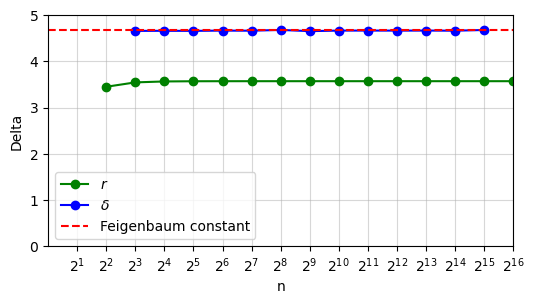

In [ ]:
r_values = [bifurcations[key] for key in 2 ** np.arange(1, len(bifurcations.keys())+1)]
delta_values = [[(r_values[i] - r_values[i-1]) / (r_values[i+1] - r_values[i])] for i in range(1, len(r_values)-1)][1:]
const = 4.6692

plt.figure(figsize=(6, 3))
plt.plot(range(2, len(r_values)+1), r_values[1:], 'go-', label=r'$r$')
plt.plot(range(3, len(r_values)), delta_values, 'bo-', label=r'$\delta$')
plt.plot(range(0, len(r_values)+1), [const] * (len(r_values)+1), 'r--', label=r'Feigenbaum constant')
plt.xlabel('n')
plt.ylabel('Delta')
plt.xticks(range(1, len(r_values)+1), [f'$2^{{{i}}}$' for i in range(1, len(r_values)+1)])
plt.ylim(0, 5)
plt.xlim(0, len(r_values))
plt.grid(alpha=0.5)
plt.legend()

We find that $\delta$ approaches a constant called "Feigenbaum constant" (approximately 4.6692).

8. Bonus exercise: Consider the map

$$
x_{n+1} = r \sin(\pi x_n)
$$

Compute the first bifurcations again for $ r > 0.82 $ and calculate $ \delta $ from the exercise above. Make a bifurcation diagram (as with the logistic map) and see what it looks like.

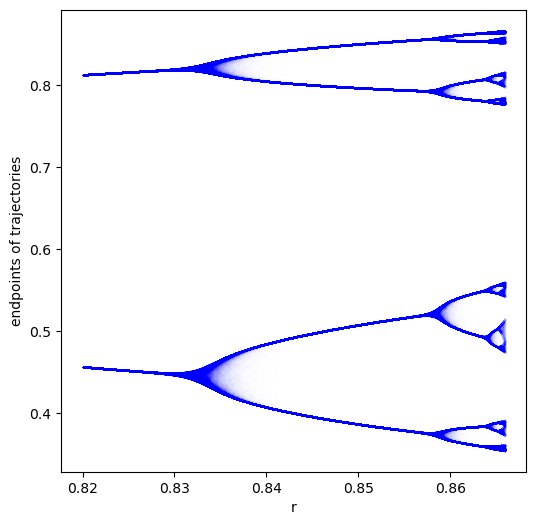

In [14]:
def sin_map(r, x):
    return r * np.sin(np.pi * x)
endpoints = plot_trajectories(np.arange(0.82, 0.866, 0.00001), sin_map, 1000, 100)

We observe a similar bifurcation diagram. Then we use the same funtion to compute several bifurcation points.

In [ ]:
bifurcations = find_bifurcations(0.82, sin_map, n_jobs=10, )

2 ** 1: 0.82,
2 ** 2: 0.8331975869746899,
2 ** 3: 0.8585866225628999,
2 ** 4: 0.8640779780622421,
2 ** 5: 0.8652572971766359,
2 ** 6: 0.8655102468285754,
2 ** 7: 0.8655644933564237,
2 ** 8: 0.8655761009013965,
Manual stop


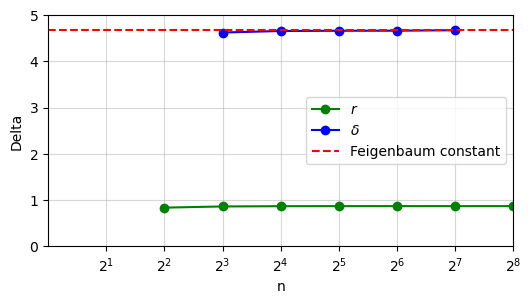

In [11]:
r_values = [bifurcations[key] for key in 2 ** np.arange(1, len(bifurcations.keys())+1)]
delta_values = [[(r_values[i] - r_values[i-1]) / (r_values[i+1] - r_values[i])] for i in range(1, len(r_values)-1)][1:]
const = 4.66920

plt.figure(figsize=(6, 3))
plt.plot(range(2, len(r_values)+1), r_values[1:], 'go-', label=r'$r$')
plt.plot(range(3, len(r_values)), delta_values, 'bo-', label=r'$\delta$')
plt.plot(range(0, len(r_values)+1), [const] * (len(r_values)+1), 'r--', label=r'Feigenbaum constant')
plt.xlabel('n')
plt.ylabel('Delta')
plt.xticks(range(1, len(r_values)+1), [f'$2^{{{i}}}$' for i in range(1, len(r_values)+1)])
plt.ylim(0, 5)
plt.xlim(0, len(r_values))
plt.grid(alpha=0.5)
plt.legend()

We find that $\delta$ approaches the Feigenbaum constant again. Although the maps are different, the conclusions are the same.

## 2. Poincaré Maps

The Poincaré Map can be used to find closed orbits and classify their stability. When you have an $n$-dimensional system $\dot{x} = f(x)$, a Surface of Section $S$ is an $(n-1)$-dimensional subspace, chosen such that for a trajectory of interest, there are $t_0, t_1, t_2, \ldots$ with $x(t_0), x(t_1), x(t_2), \ldots \in S$, but for all other $t$, $x(t) \notin S$. Also, $S$ is not tangent to the trajectory. That means, the trajectory crosses the Surface of Section, but does not just touch it or move within it. A Poincaré Map $P$ for the Surface of Section $S$ and the dynamical system $\dot{x} = f(x)$ is then defined via $P(x(t_i)) = x(t_{i+1})$, i.e., the map "samples" from a trajectory at the times it crosses $S$.

1. Let $\dot{x} = f(x)$ be a dynamical system and $P$ a corresponding Poincaré map with surface of section $S$. If there exists $y \in S$ such that $P(y) = y$, then there exists a closed cycle in the system. Is that also a necessary condition? Why/why not?

If $P(y) = y$, it means $y$ is a fixed point of the Poincaré map. This implies the trajectory of the dynamical system returns to the same point $y$ on the surface of section $S$ after one period. Hence, there exists a closed cycle in the system. Therefore, $P(y) = y$ is a sufficient condition for the existence of a closed cycle.

If there exists a closed cycle in the system, the trajectory will repeatedly intersect the surface of section $S$. In some cases, this intersection can be described as a single fixed point of the Poincaré map ($P(y) = y$). However, for more complex periodic or quasi-periodic orbits, the trajectory might intersect $S$ at multiple points, forming a cycle in $P$ rather than a single fixed point. Thus, $P(y) = y$ is not a necessary condition for the existence of a closed cycle.

2. Consider the following system:  
$$
\dot{r} = r(1-r), \quad \dot{\theta} = 2.
$$

Explicitly find a Poincaré Map for the surface of section $S = \{(r, \theta) : r > 0, \theta = 0\}$. Use it to prove that there exists a closed cycle at $r = 1$. Is it stable, unstable, or half-stable? (Hint: to find the map, take an initial condition $(r_1, 0) \in S$. After one revolution, the trajectory intersects $S$ at $(r_2, 0)$. To get $r_2$, note that you can read off the time $T$ the revolution takes from the equations.)


First, with an initial condition $(r_1, 0)$, by solving $\dot{r} = r(1-r)$ and $ \dot{\theta} = 2 $ we get

$$
r(t) = \frac{r_1 e^t}{r_1 e^t + 1 - r_1}, \quad\theta(t)=2t.
$$

$\theta$ increases uniformly with time, completing a full revolution (from $\theta = 0$ to $\theta = 2\pi$) in time $T = \frac{2\pi}{2} = \pi$.

Substitute $t = \pi$ into the expression for $r(t)$, get the Poincaré map:
$$
P(r_1) = \frac{r_1 e^\pi}{r_1 e^\pi + 1 - r_1}.
$$

If $r_1 = 1$, the radial equation becomes $\dot{r} = 0$, meaning $r = 1$ is constant over time. Thus, $r = 1$ is a fixed point of the Poincaré map, corresponding to a closed cycle.

To determine stability, compute the derivative of the Poincaré map $P(r_1)$:
$$
P'(r_1) = \frac{(e^\pi)(r_1 e^\pi + 1 - r_1) - r_1 e^\pi(e^\pi - 1)}{(r_1 e^\pi + 1 - r_1)^2}.
$$

With respect to $r_1$ at $r_1 = 1$, $P'(1) = e^\pi/e^{2\pi} = e^{-\pi}$.

Since $P'(1) < 1$, the closed cycle at $r = 1$ is stable.